In [1]:
!pip install nltk

In [2]:
!pip install textblob

In [3]:
!pip install wordcloud

In [4]:

!pip install keras tensorflow

In [5]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
text='I love painting and reading. They help me relax and make me happy. It helps me reflect and respond in color and texture. Both activities require focus and attention.'
text_lower=text.lower()
text_clean=text_lower.translate(str.maketrans('', '', string.punctuation))
print("Cleaned text: ", text_clean)

Cleaned text:  i love painting and reading they help me relax and make me happy it helps me reflect and respond in color and texture both activities require focus and attention


In [7]:
word_tokens=word_tokenize(text_clean)
sent_tokens=sent_tokenize(text)

print("Text after word tokenization: ", word_tokens)
print("Text after sentence tokenization: ", sent_tokens)

Text after word tokenization:  ['i', 'love', 'painting', 'and', 'reading', 'they', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'it', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'both', 'activities', 'require', 'focus', 'and', 'attention']
Text after sentence tokenization:  ['I love painting and reading.', 'They help me relax and make me happy.', 'It helps me reflect and respond in color and texture.', 'Both activities require focus and attention.']


In [8]:
sent_split=text.split()
print("Text after tokenization done using split()", sent_split)

Text after tokenization done using split() ['I', 'love', 'painting', 'and', 'reading.', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy.', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture.', 'Both', 'activities', 'require', 'focus', 'and', 'attention.']


In [9]:
stop_words = set(stopwords.words('english'))
filter= [i for i in word_tokens if i.lower() not in stop_words]
print("Filtered Words:", filter)

Filtered Words: ['love', 'painting', 'reading', 'help', 'relax', 'make', 'happy', 'helps', 'reflect', 'respond', 'color', 'texture', 'activities', 'require', 'focus', 'attention']


<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

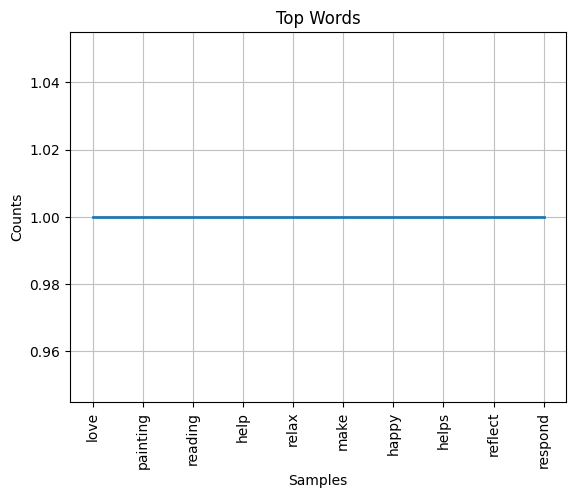

In [10]:
fd = FreqDist(filter)
fd.plot(10, title="Top Words")

In [11]:
only_alpha = re.findall(r'\b[a-zA-Z]+\b', text)
print(only_alpha)

['I', 'love', 'painting', 'and', 'reading', 'They', 'help', 'me', 'relax', 'and', 'make', 'me', 'happy', 'It', 'helps', 'me', 'reflect', 'and', 'respond', 'in', 'color', 'and', 'texture', 'Both', 'activities', 'require', 'focus', 'and', 'attention']


In [12]:
ps=PorterStemmer()
stemmed=[ps.stem(i) for i in filter]
print("Stemmed words: ", stemmed)

Stemmed words:  ['love', 'paint', 'read', 'help', 'relax', 'make', 'happi', 'help', 'reflect', 'respond', 'color', 'textur', 'activ', 'requir', 'focu', 'attent']


In [13]:
l=WordNetLemmatizer()
lemmatized=[l.lemmatize(i.lower()) for i in filter]
print("Lemmatized words: ", lemmatized)

Lemmatized words:  ['love', 'painting', 'reading', 'help', 'relax', 'make', 'happy', 'help', 'reflect', 'respond', 'color', 'texture', 'activity', 'require', 'focus', 'attention']


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
lines = ["Develop a machine learning project", "Deep Learning is a subset of machine learning", "AI makes things easier"]
cv = CountVectorizer()
X = cv.fit_transform(lines)
print(cv.get_feature_names_out())
print(X.toarray())

['ai' 'deep' 'develop' 'easier' 'is' 'learning' 'machine' 'makes' 'of'
 'project' 'subset' 'things']
[[0 0 1 0 0 1 1 0 0 1 0 0]
 [0 1 0 0 1 2 1 0 1 0 1 0]
 [1 0 0 1 0 0 0 1 0 0 0 1]]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(lines)
print(tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())
features=tfidf.get_feature_names_out()

['ai' 'deep' 'develop' 'easier' 'is' 'learning' 'machine' 'makes' 'of'
 'project' 'subset' 'things']
[[0.         0.         0.5628291  0.         0.         0.42804604
  0.42804604 0.         0.         0.5628291  0.         0.        ]
 [0.         0.38091445 0.         0.         0.38091445 0.57939052
  0.28969526 0.         0.38091445 0.         0.38091445 0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.5        0.         0.         0.         0.5       ]]


In [16]:
for i in range(len(lines)):
    print("Text ", i+1)
    row = tfidf_matrix[i].toarray()[0]
    top = row.argsort()[-3:][::-1]
    for i in top:
        print(f"{features[i]}")

Text  1
project
develop
machine
Text  2
learning
subset
is
Text  3
things
ai
easier


In [17]:
for i in range(len(lines)):
    print("Text ", i+1)
    row = tfidf_matrix[i].toarray()[0]
    top = row.argsort()[-3:][::-1]
    for i in top:
        print(f"{features[i]}")

Text  1
project
develop
machine
Text  2
learning
subset
is
Text  3
things
ai
easier


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform(["Artificial Intelligence (AI) is revolutionizing industries by automating tasks and providing data-driven insights", "Blockchain ensures transparency, security, and immutability used in supply chain management"])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])


Cosine Similarity: 0.04249803280195218


In [19]:
from textblob import TextBlob
review='A reliable and convenient experience. The interface is clean, user-friendly, and makes booking super quick. I rarely face cancellations or delays. '
blob = TextBlob(review)
polarity=blob.sentiment.polarity
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

Polarity: 0.3333333333333333
Subjectivity: 0.6916666666666667


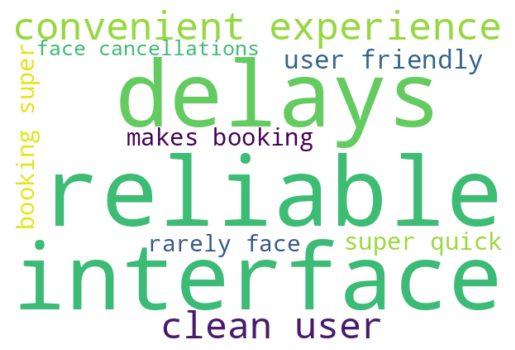

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive_text = ""
for r in review:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        positive_text += review + " "

# Generate and display word cloud for positive reviews
wc = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np


data='Cars have become an essential part of modern life, offering convenience, speed, and freedom of travel. From compact hatchbacks to luxurious sedans and powerful SUVs, the automotive industry caters to a wide range of preferences and needs. Technological advancements have introduced smart features like automatic braking, lane assist, and voice-activated controls, making driving safer and more enjoyable. Electric vehicles are also gaining popularity due to their environmental benefits and lower running costs. Whether used for daily commutes, road trips, or simply exploring new places, cars continue to evolve, shaping how we live, work, and connect with the world around us.'
tokenizer = Tokenizer()
fin=tokenizer.fit_on_texts([data])
sequences = []
words = data.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0 ...  0  4  5]
 [ 0  0  0 ...  4  5  7]
 [ 0  0  0 ...  5  7  8]
 ...
 [ 0  0  4 ... 84  6 85]
 [ 0  4  5 ...  6 85 86]
 [ 4  5  7 ... 85 86 87]]


In [22]:
X = padded[:, :-1]
y = padded[:, -1]
y = np.array(y)

total_words = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
